In [171]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

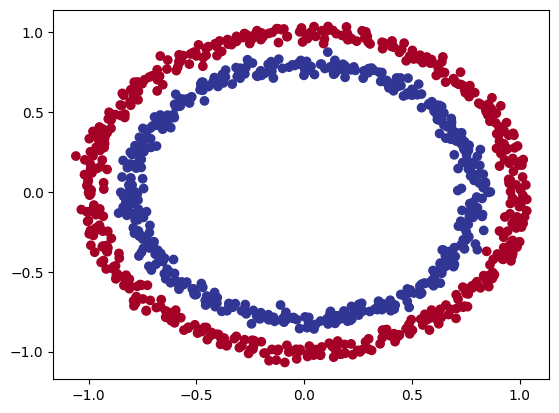

In [172]:
n_sample = 1000

X, y = make_circles(n_sample, noise=0.03, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [173]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [174]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [175]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
        self.relu = nn.ReLU() # non-linearity
        
    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
model_3 = CircleModelV2().to('cpu')
model_3


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [176]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [177]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [178]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
    model_3.train()
    y_preds = model_3(X_train)
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
        print(f"Epoch: {epoch}, Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0, Loss: 0.6929, Test Loss: 0.6932, Test Accuracy: 50.00%
Epoch: 1, Loss: 0.6929, Test Loss: 0.6931, Test Accuracy: 50.00%
Epoch: 2, Loss: 0.6928, Test Loss: 0.6931, Test Accuracy: 50.00%
Epoch: 3, Loss: 0.6928, Test Loss: 0.6930, Test Accuracy: 50.00%
Epoch: 4, Loss: 0.6927, Test Loss: 0.6929, Test Accuracy: 50.00%
Epoch: 5, Loss: 0.6927, Test Loss: 0.6929, Test Accuracy: 50.00%
Epoch: 6, Loss: 0.6926, Test Loss: 0.6928, Test Accuracy: 50.00%
Epoch: 7, Loss: 0.6926, Test Loss: 0.6927, Test Accuracy: 50.00%
Epoch: 8, Loss: 0.6925, Test Loss: 0.6927, Test Accuracy: 50.00%
Epoch: 9, Loss: 0.6925, Test Loss: 0.6926, Test Accuracy: 50.00%
Epoch: 10, Loss: 0.6925, Test Loss: 0.6926, Test Accuracy: 50.00%
Epoch: 11, Loss: 0.6924, Test Loss: 0.6926, Test Accuracy: 50.00%
Epoch: 12, Loss: 0.6924, Test Loss: 0.6925, Test Accuracy: 50.00%
Epoch: 13, Loss: 0.6924, Test Loss: 0.6925, Test Accuracy: 50.50%
Epoch: 14, Loss: 0.6924, Test Loss: 0.6925, Test Accuracy: 50.50%
Epoch: 15, Loss: 0.6

In [179]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

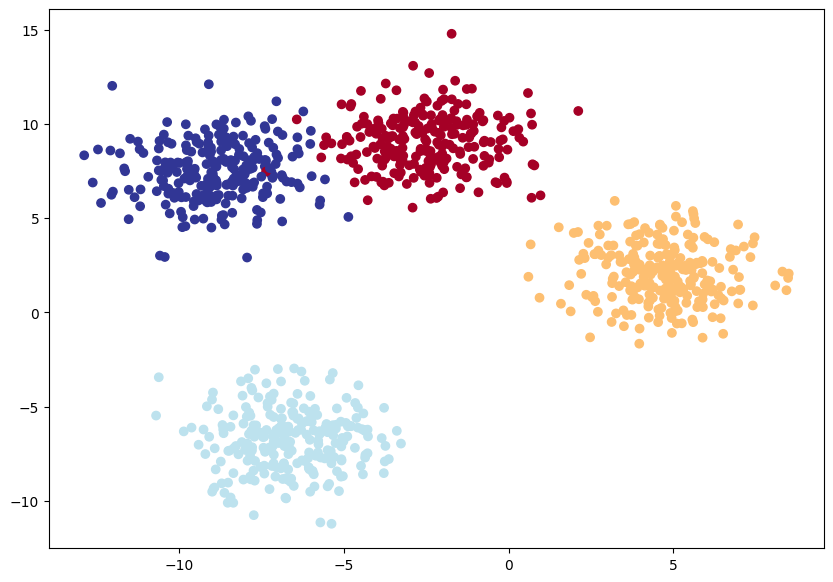

In [180]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)


# PLOT

plt.figure(figsize=(10,7))

plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

In [181]:
# Multi_class classification


In [182]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [183]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units = 8):
        """

        Args:
            input_features (_type_): Liczba class w modelu na wejsciu
            output_features (_type_): Liczba class w modelu na wyjsciu
            hidden_units (int, optional): LIczba warstw modelu pomiędzy warstwami Defaults to 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(input_features, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_features)
        )
        
        self.relu = nn.ReLU() # non-linearity
        
    def forward(self, x):
        return self.linear_layer_stack(x)
    
model4 = BlobModel(2,4,8).to(device)
model4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
  (relu): ReLU()
)

In [184]:
# loss function

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model4.parameters(), lr=0.1)

In [185]:
model4.eval()
with torch.inference_mode():
    y_logits = model4(X_blob_test.to(device))
    

In [186]:
y_pred_probs = torch.softmax(y_logits,dim=1)

print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [187]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [188]:
torch. manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 300
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    model4.train()
    y_logits = model4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #testing
    model4.eval()
    with torch.inference_mode():
        test_logits = model4(X_blob_test)
        test_pred = torch.softmax(test_logits, dim = 1).argmax(dim=1)
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)
        print(f"Epoch: {epoch}, Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0, Loss: 1.1588, Test Loss: 1.0755, Test Accuracy: 48.00%
Epoch: 1, Loss: 1.0636, Test Loss: 1.0039, Test Accuracy: 55.00%
Epoch: 2, Loss: 0.9801, Test Loss: 0.9413, Test Accuracy: 64.00%
Epoch: 3, Loss: 0.9094, Test Loss: 0.8877, Test Accuracy: 74.50%
Epoch: 4, Loss: 0.8508, Test Loss: 0.8419, Test Accuracy: 90.50%
Epoch: 5, Loss: 0.8023, Test Loss: 0.8027, Test Accuracy: 94.00%
Epoch: 6, Loss: 0.7617, Test Loss: 0.7686, Test Accuracy: 95.00%
Epoch: 7, Loss: 0.7271, Test Loss: 0.7384, Test Accuracy: 95.00%
Epoch: 8, Loss: 0.6970, Test Loss: 0.7110, Test Accuracy: 96.00%
Epoch: 9, Loss: 0.6699, Test Loss: 0.6853, Test Accuracy: 97.00%
Epoch: 10, Loss: 0.6448, Test Loss: 0.6607, Test Accuracy: 97.50%
Epoch: 11, Loss: 0.6210, Test Loss: 0.6367, Test Accuracy: 98.00%
Epoch: 12, Loss: 0.5979, Test Loss: 0.6128, Test Accuracy: 98.00%
Epoch: 13, Loss: 0.5752, Test Loss: 0.5889, Test Accuracy: 98.50%
Epoch: 14, Loss: 0.5527, Test Loss: 0.5653, Test Accuracy: 99.50%
Epoch: 15, Loss: 0.5